In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os

# Set the working directory
os.chdir('/data/keeling/a/ad87/downscale')


### Plot historical

#### Load the NEX-GDDP reference downscaled data

In [2]:
nexgddp_data_path = '/data/keeling/a/cristi/a/downscaled_data/cmip6/nex_gddp/ncs/RO_NEX-GDDP-CMIP6/CNRM-ESM2-1/historical/r1i1p1f2/tas/'
nexgddp_files = [f'{nexgddp_data_path}/tas_day_CNRM-ESM2-1_historical_r1i1p1f2_gr_{year}_rou.nc' for year in range(1950, 2015)]
nexgddp_ds = xr.open_mfdataset(nexgddp_files, combine='by_coords')
nexgddp_mean = nexgddp_ds['tas'].mean(dim='time')
mask_nexgddp_na = nexgddp_mean.isnull()
target_lat = nexgddp_ds.lat
target_lon = nexgddp_ds.lon

#### Load the CMIP6 raw data

In [3]:
cmip6_file = '/data/keeling/a/cristi/a/downscaled_data/cmip6/raw/zarr/RO_CMIP6_raw/CNRM-ESM2-1/historical/r1i1p1f2/tas/tas_day_CNRM-ESM2-1_historical_r1i1p1f2_gr_1950_2014_rou.zarr'
cmip6_ds = xr.open_zarr(cmip6_file, consolidated=True)
cmip6_mean = cmip6_ds['tas'].mean(dim='time')
cmip6_near = cmip6_mean.interp(lat=target_lat, lon=target_lon, method='nearest', kwargs={"fill_value": "extrapolate"})
cmip6_mean  = cmip6_near.where(~mask_nexgddp_na, np.nan)

#### Load the CNN downscaled data

In [4]:
cnn_file = 'ncs/cnn/predicted_high_res_tas_encod_v02.nc'
cnn_ds = xr.open_mfdataset(cnn_file, combine='by_coords', parallel=True)
cnn_mean = cnn_ds['tas_downscaled'].mean(dim='time')
cnn_mean  = cnn_mean.where(~mask_nexgddp_na, np.nan)

#### Load the U-Net downscaled data

In [5]:
unet_file = 'ncs/unet/predicted_high_res_tas_unet_v02.nc'
unet_ds = xr.open_mfdataset(unet_file, combine='by_coords', parallel=True)
unet_mean = unet_ds['tas_downscaled'].mean(dim='time')
unet_mean  = unet_mean.where(~mask_nexgddp_na, np.nan)

#### Plot multiannual means

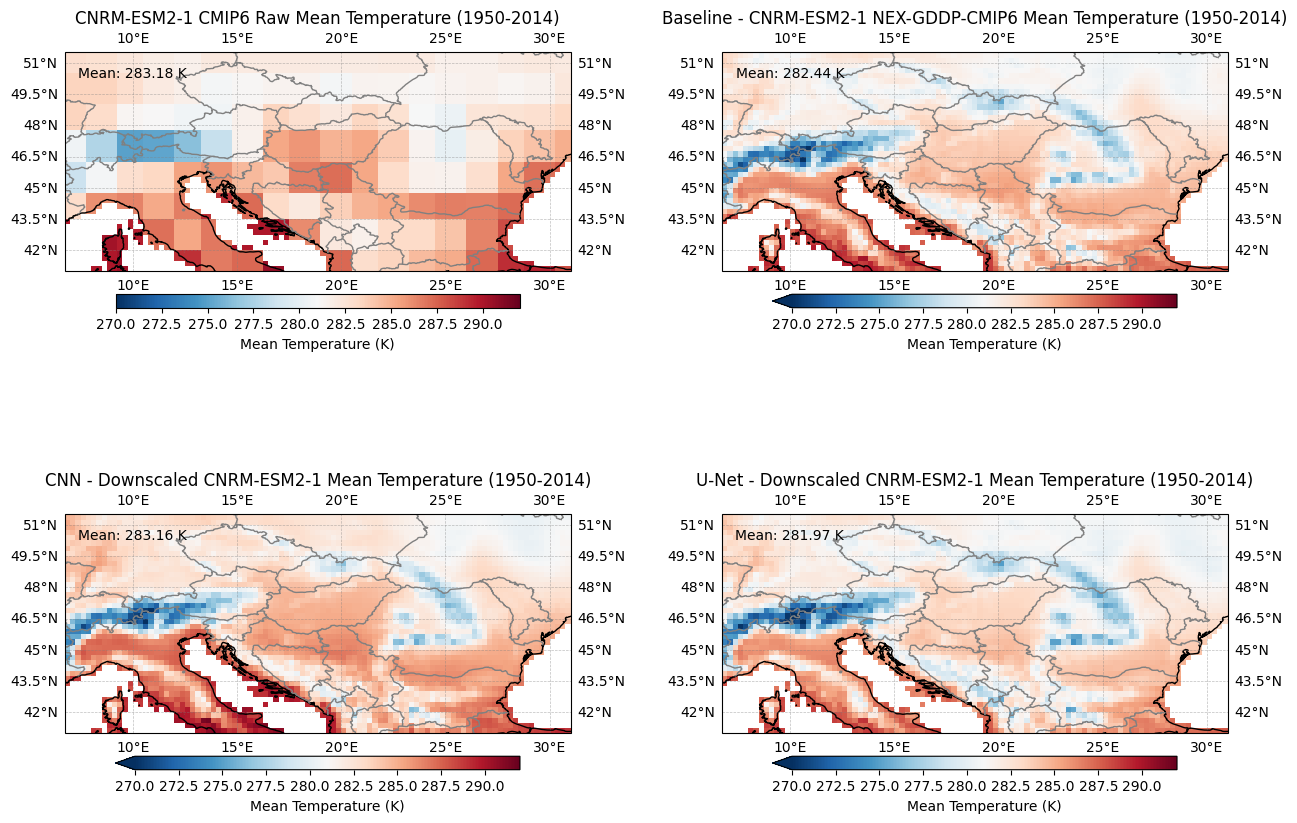

In [6]:
# Create subplots with a specified figure size
fig, axs = plt.subplots(2, 2, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Adjust space between subplots (reduce hspace for less vertical space)
fig.subplots_adjust(hspace=0, wspace=0.3)  # Adjust hspace to reduce vertical space

# Define common color limits
vmin, vmax = 270, 292

# Calculate mean global temperature for each dataset
mean_cmip6 = cmip6_mean.mean().values
mean_nexgddp = nexgddp_mean.mean().values
mean_cnn = cnn_mean.mean().values
mean_unet = unet_mean.mean().values

# Plot CMIP6 raw mean temperature
cmip6_mean.plot(
    ax=axs[0, 0],
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=vmin,
    vmax=vmax,
    cbar_kwargs={
        'orientation': 'horizontal',
        'pad': 0.05,  # Reduced pad to minimize space
        'shrink': 0.8,
        'aspect': 30,
        'label': 'Mean Temperature (K)'
    }
)
axs[0, 0].coastlines()
axs[0, 0].add_feature(cfeature.BORDERS, edgecolor='gray')
axs[0, 0].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
axs[0, 0].set_title('CNRM-ESM2-1 CMIP6 Raw Mean Temperature (1950-2014)')

# Add mean temperature text to the CMIP6 plot
axs[0, 0].text(10, 50.5, f'Mean: {mean_cmip6:.2f} K', fontsize=10, ha='center', va='center', color='black')

# Plot NEX-GDDP mean temperature
nexgddp_mean.plot(
    ax=axs[0, 1],
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=vmin,
    vmax=vmax,
    cbar_kwargs={
        'orientation': 'horizontal',
        'pad': 0.05,  # Reduced pad to minimize space
        'shrink': 0.8,
        'aspect': 30,
        'label': 'Mean Temperature (K)'
    }
)
axs[0, 1].coastlines()
axs[0, 1].add_feature(cfeature.BORDERS, edgecolor='gray')
axs[0, 1].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
axs[0, 1].set_title('Baseline - CNRM-ESM2-1 NEX-GDDP-CMIP6 Mean Temperature (1950-2014)')

# Add mean temperature text to the NEX-GDDP plot
axs[0, 1].text(10, 50.5, f'Mean: {mean_nexgddp:.2f} K', fontsize=10, ha='center', va='center', color='black')

# Plot CNN downscaled mean temperature
cnn_mean.plot(
    ax=axs[1, 0],
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=vmin,
    vmax=vmax,
    cbar_kwargs={
        'orientation': 'horizontal',
        'pad': 0.05,  # Reduced pad to minimize space
        'shrink': 0.8,
        'aspect': 30,
        'label': 'Mean Temperature (K)'
    }
)
axs[1, 0].coastlines()
axs[1, 0].add_feature(cfeature.BORDERS, edgecolor='gray')
axs[1, 0].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
axs[1, 0].set_title('CNN - Downscaled CNRM-ESM2-1 Mean Temperature (1950-2014)')

# Add mean temperature text to the CNN plot
axs[1, 0].text(10, 50.5, f'Mean: {mean_cnn:.2f} K', fontsize=10, ha='center', va='center', color='black')

# Plot U-Net downscaled mean temperature
unet_mean.plot(
    ax=axs[1, 1],
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=vmin,
    vmax=vmax,
    cbar_kwargs={
        'orientation': 'horizontal',
        'pad': 0.05,  # Reduced pad to minimize space
        'shrink': 0.8,
        'aspect': 30,
        'label': 'Mean Temperature (K)'
    }
)
axs[1, 1].coastlines()
axs[1, 1].add_feature(cfeature.BORDERS, edgecolor='gray')
axs[1, 1].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
axs[1, 1].set_title('U-Net - Downscaled CNRM-ESM2-1 Mean Temperature (1950-2014)')

# Add mean temperature text to the U-Net plot
axs[1, 1].text(10, 50.5, f'Mean: {mean_unet:.2f} K', fontsize=10, ha='center', va='center', color='black')

# Show the combined plot
plt.show()

#### Plot diferences

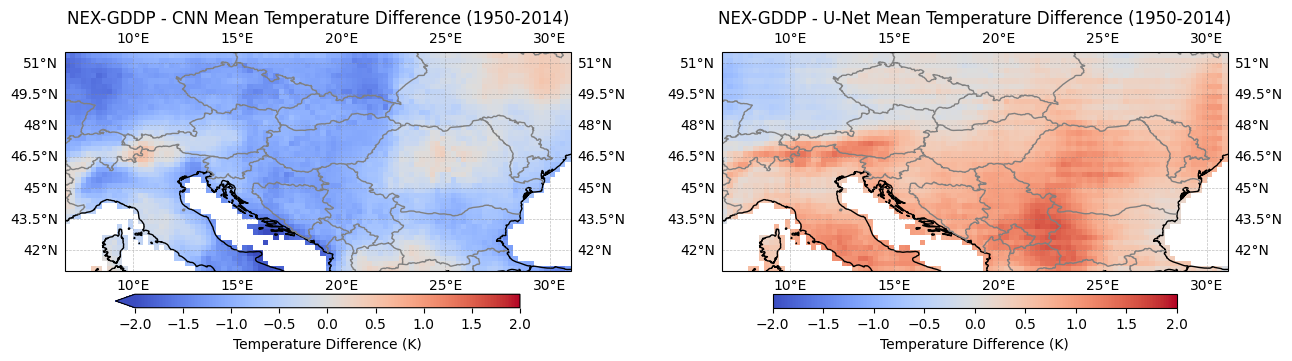

In [7]:
# Create subplots with a specified figure size for differences
fig, axs = plt.subplots(1, 2, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Adjust space between subplots
fig.subplots_adjust(wspace=0.3)  # Adjust wspace for horizontal space

# Calculate differences
nexgddp_cnn_diff = nexgddp_mean - cnn_mean
nexgddp_unet_diff = nexgddp_mean - unet_mean

# Define common color limits for differences
vmin_diff, vmax_diff = -2, 2  # Adjust these limits based on expected differences

# Plot difference: NEX-GDDP - CNN
nexgddp_cnn_diff.plot(
    ax=axs[0],
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    vmin=vmin_diff,
    vmax=vmax_diff,
    cbar_kwargs={
        'orientation': 'horizontal',
        'pad': 0.05,
        'shrink': 0.8,
        'aspect': 30,
        'label': 'Temperature Difference (K)'
    }
)
axs[0].coastlines()
axs[0].add_feature(cfeature.BORDERS, edgecolor='gray')
axs[0].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
axs[0].set_title('NEX-GDDP - CNN Mean Temperature Difference (1950-2014)')

# Plot difference: NEX-GDDP - U-Net
nexgddp_unet_diff.plot(
    ax=axs[1],
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    vmin=vmin_diff,
    vmax=vmax_diff,
    cbar_kwargs={
        'orientation': 'horizontal',
        'pad': 0.05,
        'shrink': 0.8,
        'aspect': 30,
        'label': 'Temperature Difference (K)'
    }
)
axs[1].coastlines()
axs[1].add_feature(cfeature.BORDERS, edgecolor='gray')
axs[1].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
axs[1].set_title('NEX-GDDP - U-Net Mean Temperature Difference (1950-2014)')

# Show the combined plot of differences
plt.show()

### Plot scenario data SSP245

#### Load the NEX-GDDP reference downscaled data

In [10]:
nexgddp_data_path = '/data/keeling/a/cristi/a/downscaled_data/cmip6/nex_gddp/ncs/RO_NEX-GDDP-CMIP6/CNRM-ESM2-1/ssp245/r1i1p1f2/tas/'
nexgddp_files = [f'{nexgddp_data_path}/tas_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_{year}_rou.nc' for year in range(2015, 2101)]
nexgddp_ds = xr.open_mfdataset(nexgddp_files, combine='by_coords')
nexgddp_mean = nexgddp_ds['tas'].mean(dim='time')
mask_nexgddp_na = nexgddp_mean.isnull()
target_lat = nexgddp_ds.lat
target_lon = nexgddp_ds.lon

#### Load the CMIP6

In [11]:
cmip6_file = '/data/keeling/a/cristi/a/downscaled_data/cmip6/raw/zarr/RO_CMIP6_raw/CNRM-ESM2-1/ssp245/r1i1p1f2/tas/tas_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_2015_2100_rou.zarr'
cmip6_ds = xr.open_zarr(cmip6_file, consolidated=True)
cmip6_mean = cmip6_ds['tas'].mean(dim='time')
cmip6_near = cmip6_mean.interp(lat=target_lat, lon=target_lon, method='nearest', kwargs={"fill_value": "extrapolate"})
cmip6_mean  = cmip6_near.where(~mask_nexgddp_na, np.nan)

#### Load the CNN downscaled data

In [12]:
cnn_file = 'ncs/cnn/predicted_high_res_tas_encod_ssp245.nc'
cnn_ds = xr.open_mfdataset(cnn_file, combine='by_coords', parallel=True)
cnn_mean = cnn_ds['tas_downscaled'].mean(dim='time')
cnn_mean  = cnn_mean.where(~mask_nexgddp_na, np.nan)

#### Load the U-Net downscaled data

In [13]:
unet_file = 'ncs/unet/predicted_high_res_tas_ssp245.nc'
unet_ds = xr.open_mfdataset(unet_file, combine='by_coords', parallel=True)
unet_mean = unet_ds['tas_downscaled'].mean(dim='time')
unet_mean  = unet_mean.where(~mask_nexgddp_na, np.nan)

#### Plot multiannual means

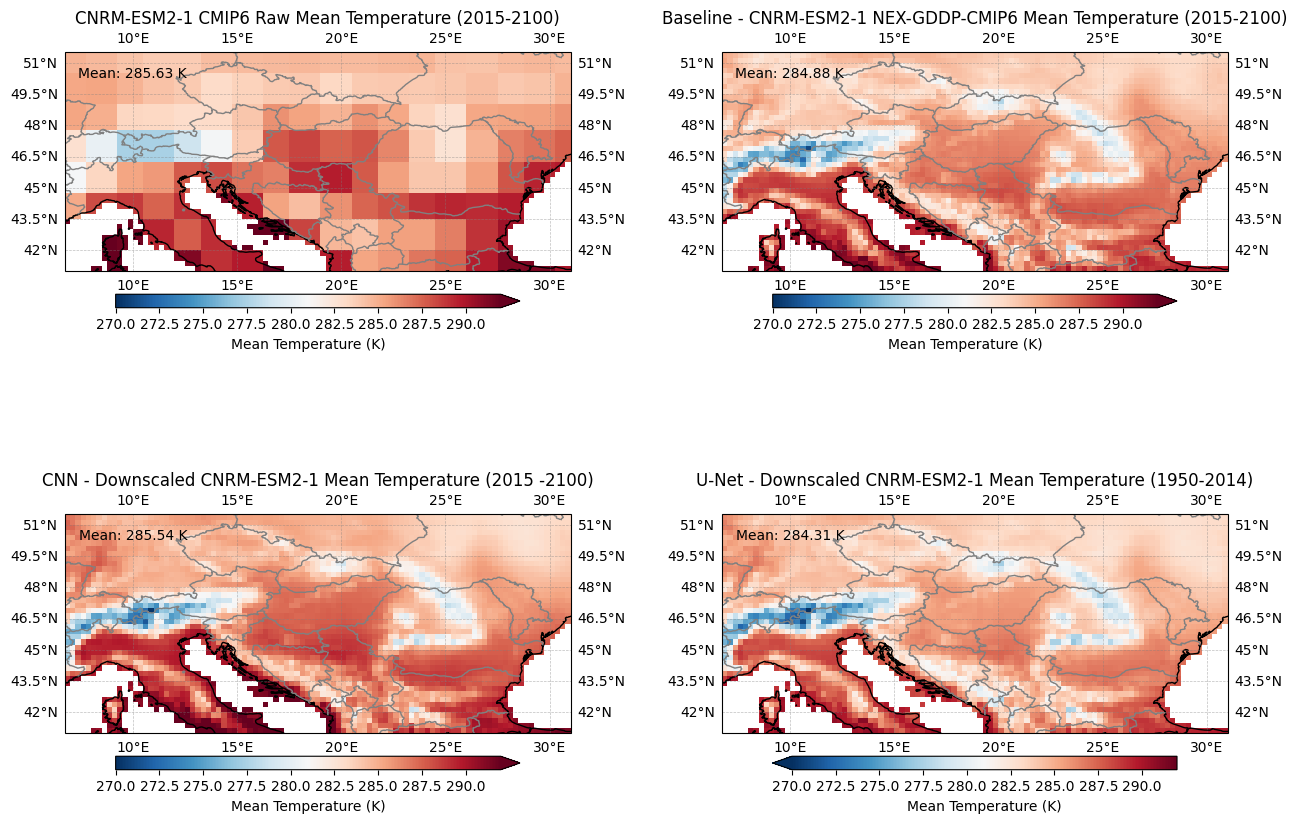

In [17]:
# Create subplots with a specified figure size
fig, axs = plt.subplots(2, 2, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Adjust space between subplots (reduce hspace for less vertical space)
fig.subplots_adjust(hspace=0, wspace=0.3)  # Adjust hspace to reduce vertical space

# Define common color limits
vmin, vmax = 270, 292

# Calculate mean global temperature for each dataset
mean_cmip6 = cmip6_mean.mean().values
mean_nexgddp = nexgddp_mean.mean().values
mean_cnn = cnn_mean.mean().values
mean_unet = unet_mean.mean().values

# Plot CMIP6 raw mean temperature
cmip6_mean.plot(
    ax=axs[0, 0],
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=vmin,
    vmax=vmax,
    cbar_kwargs={
        'orientation': 'horizontal',
        'pad': 0.05,  # Reduced pad to minimize space
        'shrink': 0.8,
        'aspect': 30,
        'label': 'Mean Temperature (K)'
    }
)
axs[0, 0].coastlines()
axs[0, 0].add_feature(cfeature.BORDERS, edgecolor='gray')
axs[0, 0].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
axs[0, 0].set_title('CNRM-ESM2-1 CMIP6 Raw Mean Temperature (2015-2100)')

# Add mean temperature text to the cmip6 plot
axs[0, 0].text(10, 50.5, f'Mean: {mean_cmip6:.2f} K', fontsize=10, ha='center', va='center', color='black')

# Plot NEX-GDDP mean temperature
nexgddp_mean.plot(
    ax=axs[0, 1],
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=vmin,
    vmax=vmax,
    cbar_kwargs={
        'orientation': 'horizontal',
        'pad': 0.05,  # Reduced pad to minimize space
        'shrink': 0.8,
        'aspect': 30,
        'label': 'Mean Temperature (K)'
    }
)
axs[0, 1].coastlines()
axs[0, 1].add_feature(cfeature.BORDERS, edgecolor='gray')
axs[0, 1].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
axs[0, 1].set_title('Baseline - CNRM-ESM2-1 NEX-GDDP-CMIP6 Mean Temperature (2015-2100)')

# Add mean temperature text to the nexgddp plot
axs[0, 1].text(10, 50.5, f'Mean: {mean_nexgddp:.2f} K', fontsize=10, ha='center', va='center', color='black')


# Plot CNN downscaled mean temperature
cnn_mean.plot(
    ax=axs[1, 0],
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=vmin,
    vmax=vmax,
    cbar_kwargs={
        'orientation': 'horizontal',
        'pad': 0.05,  # Reduced pad to minimize space
        'shrink': 0.8,
        'aspect': 30,
        'label': 'Mean Temperature (K)'
    }
)
axs[1, 0].coastlines()
axs[1, 0].add_feature(cfeature.BORDERS, edgecolor='gray')
axs[1, 0].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
axs[1, 0].set_title('CNN - Downscaled CNRM-ESM2-1 Mean Temperature (2015 -2100)')

# Add mean temperature text to the CNNt plot
axs[1, 0].text(10, 50.5, f'Mean: {mean_cnn:.2f} K', fontsize=10, ha='center', va='center', color='black')

# Plot U-Net downscaled mean temperature
unet_mean.plot(
    ax=axs[1, 1],
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=vmin,
    vmax=vmax,
    cbar_kwargs={
        'orientation': 'horizontal',
        'pad': 0.05,  # Reduced pad to minimize space
        'shrink': 0.8,
        'aspect': 30,
        'label': 'Mean Temperature (K)'
    }
)
axs[1, 1].coastlines()
axs[1, 1].add_feature(cfeature.BORDERS, edgecolor='gray')
axs[1, 1].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
axs[1, 1].set_title('U-Net - Downscaled CNRM-ESM2-1 Mean Temperature (1950-2014)')

# Add mean temperature text to the U-Net plot
axs[1, 1].text(10, 50.5, f'Mean: {mean_unet:.2f} K', fontsize=10, ha='center', va='center', color='black')

# Show the combined plot
plt.show()

#### Plot diferences

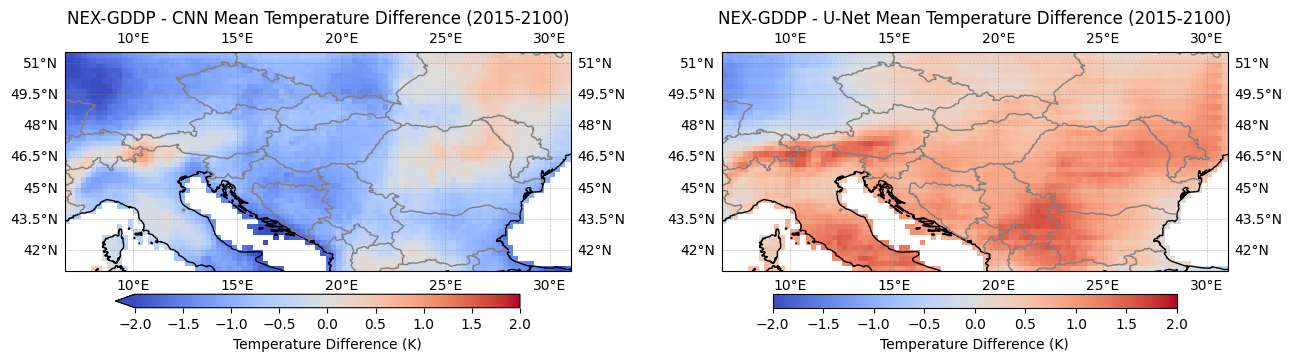

In [15]:
# Create subplots with a specified figure size for differences
fig, axs = plt.subplots(1, 2, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Adjust space between subplots
fig.subplots_adjust(wspace=0.3)  # Adjust wspace for horizontal space

# Calculate differences
nexgddp_cnn_diff = nexgddp_mean - cnn_mean
nexgddp_unet_diff = nexgddp_mean - unet_mean

# Define common color limits for differences
vmin_diff, vmax_diff = -2, 2  # Adjust these limits based on expected differences

# Plot difference: NEX-GDDP - CNN
nexgddp_cnn_diff.plot(
    ax=axs[0],
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    vmin=vmin_diff,
    vmax=vmax_diff,
    cbar_kwargs={
        'orientation': 'horizontal',
        'pad': 0.05,
        'shrink': 0.8,
        'aspect': 30,
        'label': 'Temperature Difference (K)'
    }
)
axs[0].coastlines()
axs[0].add_feature(cfeature.BORDERS, edgecolor='gray')
axs[0].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
axs[0].set_title('NEX-GDDP - CNN Mean Temperature Difference (2015-2100)')

# Plot difference: NEX-GDDP - U-Net
nexgddp_unet_diff.plot(
    ax=axs[1],
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    vmin=vmin_diff,
    vmax=vmax_diff,
    cbar_kwargs={
        'orientation': 'horizontal',
        'pad': 0.05,
        'shrink': 0.8,
        'aspect': 30,
        'label': 'Temperature Difference (K)'
    }
)
axs[1].coastlines()
axs[1].add_feature(cfeature.BORDERS, edgecolor='gray')
axs[1].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
axs[1].set_title('NEX-GDDP - U-Net Mean Temperature Difference (2015-2100)')

# Show the combined plot of differences
plt.show()

#### Plot time series gloabl mean 

/data/keeling/a/ad87/miniconda3/envs/ml/lib/python3.10/site-packages/xarray/backends/api.py:365: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 365. This could degrade performance. Instead, consider rechunking after loading.
  var_chunks = _get_chunk(var, chunks, chunkmanager)


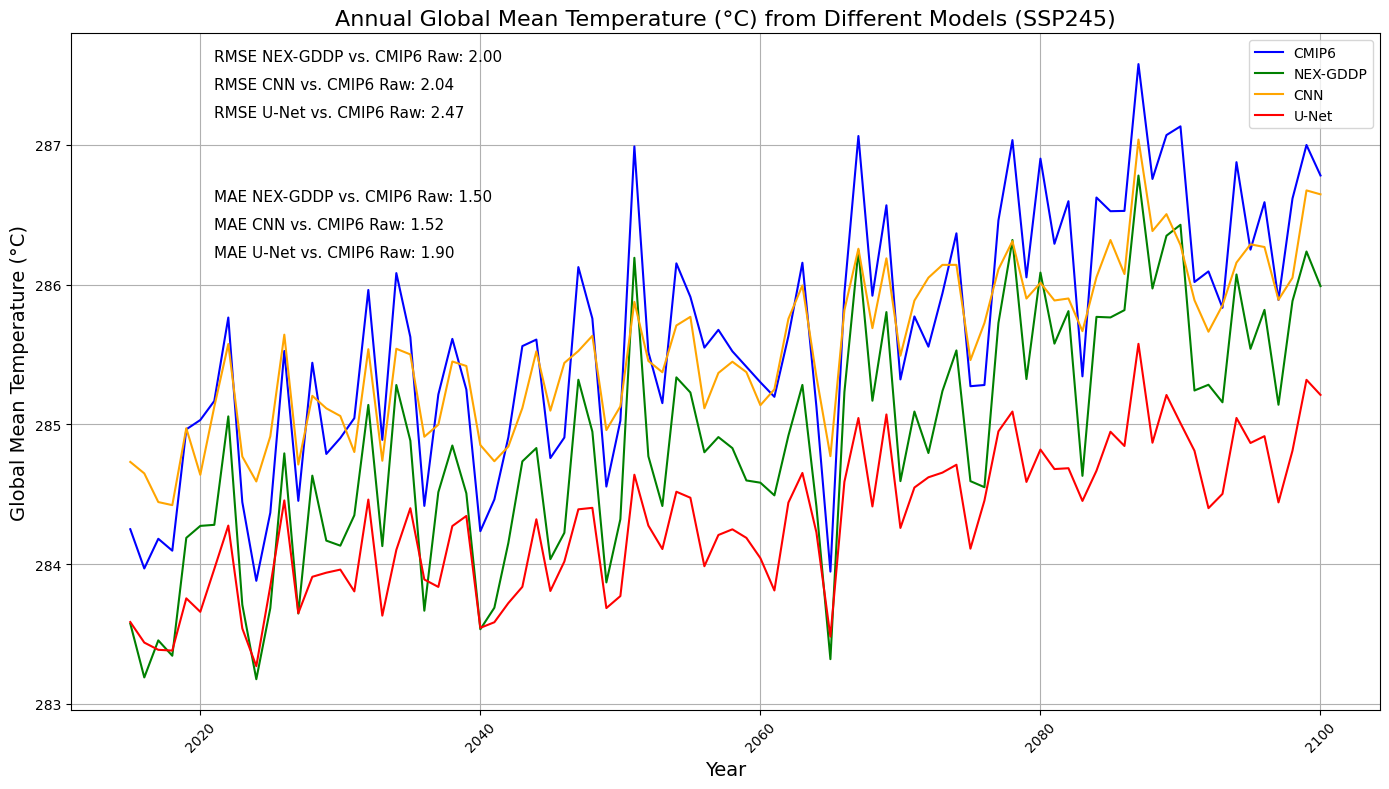

In [16]:
import warnings
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load NEX-GDDP data with Dask
nexgddp_data_path = '/data/keeling/a/cristi/a/downscaled_data/cmip6/nex_gddp/ncs/RO_NEX-GDDP-CMIP6/CNRM-ESM2-1/ssp245/r1i1p1f2/tas/'
nexgddp_files = [f'{nexgddp_data_path}/tas_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_{year}_rou.nc' for year in range(2015, 2101)]
nexgddp_ds = xr.open_mfdataset(nexgddp_files, combine='by_coords', chunks={'time': 365})
nexgddp_annual = nexgddp_ds['tas'].resample(time='YE').mean(dim='time')
nexgddp_global_mean = nexgddp_annual.mean(dim=['lat', 'lon'])
mask_nexgddp_na = nexgddp_annual.isnull()
# Load CMIP6 data with Dask
cmip6_file = '/data/keeling/a/cristi/a/downscaled_data/cmip6/raw/zarr/RO_CMIP6_raw/CNRM-ESM2-1/ssp245/r1i1p1f2/tas/tas_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_2015_2100_rou.zarr'
cmip6_ds = xr.open_zarr(cmip6_file, consolidated=True, chunks={'time': 365})
cmip6_ds = cmip6_ds.interp(lat=target_lat, lon=target_lon, method='nearest', kwargs={"fill_value": "extrapolate"})

cmip6_annual = cmip6_ds['tas'].resample(time='YE').mean(dim='time')
cmip6_annual = cmip6_annual.where(~mask_nexgddp_na, np.nan)
cmip6_global_mean = cmip6_annual.mean(dim=['lat', 'lon'])

# Load CNN downscaled data with Dask
cnn_file = 'ncs/cnn/predicted_high_res_tas_encod_ssp245.nc'
cnn_ds = xr.open_mfdataset(cnn_file, combine='by_coords', parallel=True, chunks={'time': 365})
cnn_annual = cnn_ds['tas_downscaled'].resample(time='YE').mean(dim='time')
cnn_annual = cnn_annual.where(~mask_nexgddp_na, np.nan)
cnn_global_mean = cnn_annual.mean(dim=['lat', 'lon'])

# Load U-Net downscaled data with Dask
unet_file = 'ncs/unet/predicted_high_res_tas_ssp245.nc'
unet_ds = xr.open_mfdataset(unet_file, combine='by_coords', parallel=True, chunks={'time': 365})
unet_annual = unet_ds['tas_downscaled'].resample(time='YE').mean(dim='time')
unet_annual = unet_annual.where(~mask_nexgddp_na, np.nan)
unet_global_mean = unet_annual.mean(dim=['lat', 'lon'])

# Function to calculate RMSE
def calculate_rmse(model1, model2):
    return np.sqrt(np.nanmean((model1 - model2) ** 2))

# Function to calculate MAE
def calculate_mae(model1, model2):
    return np.nanmean(np.abs(model1 - model2))

# Calculate RMSE values
rmse_nexgddp = calculate_rmse(cmip6_annual.values, nexgddp_annual.values)
rmse_cnn = calculate_rmse(cmip6_annual.values, cnn_annual.values)
rmse_unet = calculate_rmse(cmip6_annual.values, unet_annual.values)

# Calculate MAE values
mae_nexgddp = calculate_mae(cmip6_annual.values, nexgddp_annual.values)
mae_cnn = calculate_mae(cmip6_annual.values, cnn_annual.values)
mae_unet = calculate_mae(cmip6_annual.values, unet_annual.values)

# Prepare for plotting
years_cmip6 = cmip6_global_mean['time.year'].values
years_nexgddp = nexgddp_global_mean['time.year'].values
years_cnn = cnn_global_mean['time.year'].values
years_unet = unet_global_mean['time.year'].values

plt.figure(figsize=(14, 8))  # Increase figure size

# Plot each model's global mean
plt.plot(years_cmip6, cmip6_global_mean.values, label='CMIP6', color='blue')
plt.plot(years_nexgddp, nexgddp_global_mean.values, label='NEX-GDDP', color='green')
plt.plot(years_cnn, cnn_global_mean.values, label='CNN', color='orange')
plt.plot(years_unet, unet_global_mean.values, label='U-Net', color='red')

# Customize the plot
plt.title('Annual Global Mean Temperature (°C) from Different Models (SSP245)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Global Mean Temperature (°C)', fontsize=14)
plt.legend()
plt.grid()
plt.xticks(rotation=45)

# Add RMSE and MAE values to the plot
plt.text(2021, 287.6, f'RMSE NEX-GDDP vs. CMIP6 Raw: {rmse_nexgddp:.2f}', fontsize=11)
plt.text(2021, 287.4, f'RMSE CNN vs. CMIP6 Raw: {rmse_cnn:.2f}', fontsize=11)
plt.text(2021, 287.2, f'RMSE U-Net vs. CMIP6 Raw: {rmse_unet:.2f}', fontsize=11)

plt.text(2021, 286.6, f'MAE NEX-GDDP vs. CMIP6 Raw: {mae_nexgddp:.2f}', fontsize=11)
plt.text(2021, 286.4, f'MAE CNN vs. CMIP6 Raw: {mae_cnn:.2f}', fontsize=11)
plt.text(2021, 286.2, f'MAE U-Net vs. CMIP6 Raw: {mae_unet:.2f}', fontsize=11)

# Adjust subplot parameters for better layout
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)

plt.tight_layout()
plt.show()